In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

In [3]:
train=pd.read_csv('Titanic_train.csv')

train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test=pd.read_csv("Titanic_test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [95]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
print(X_train.head())
print(Y_train.head())


   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


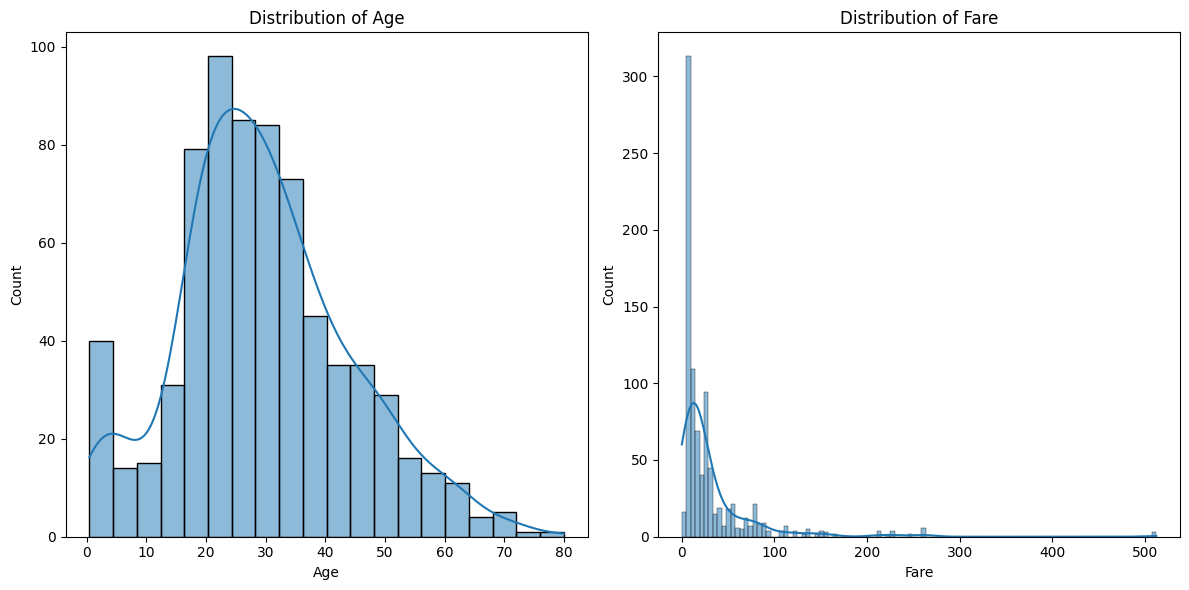

In [10]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Fare']):
    plt.subplot(1, 2, i + 1)
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

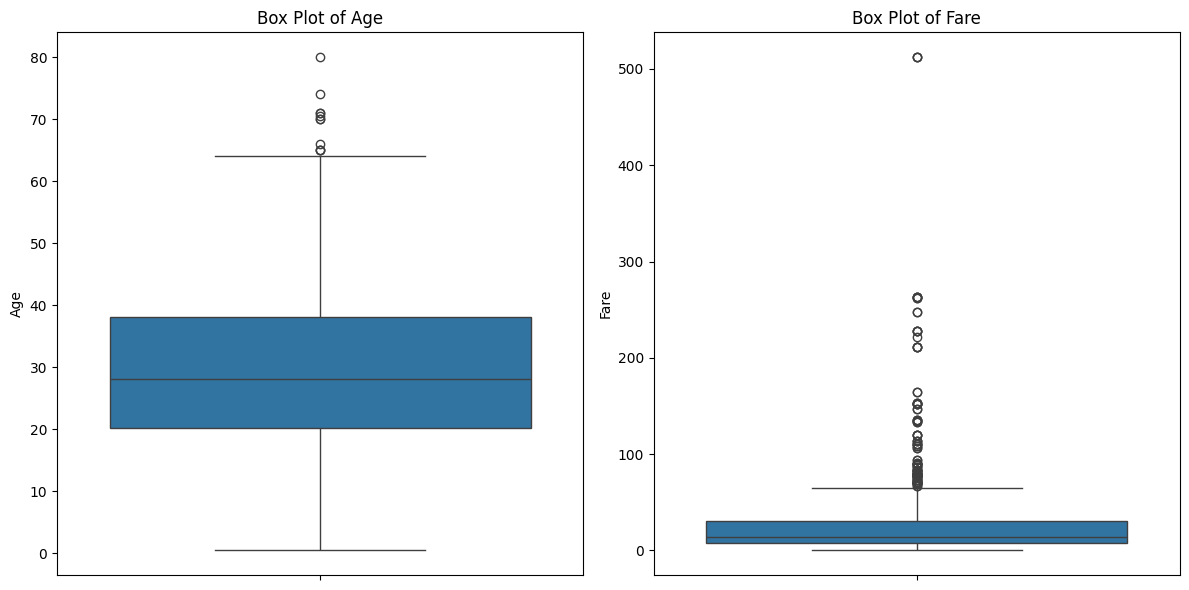

In [11]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Fare']):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=train[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

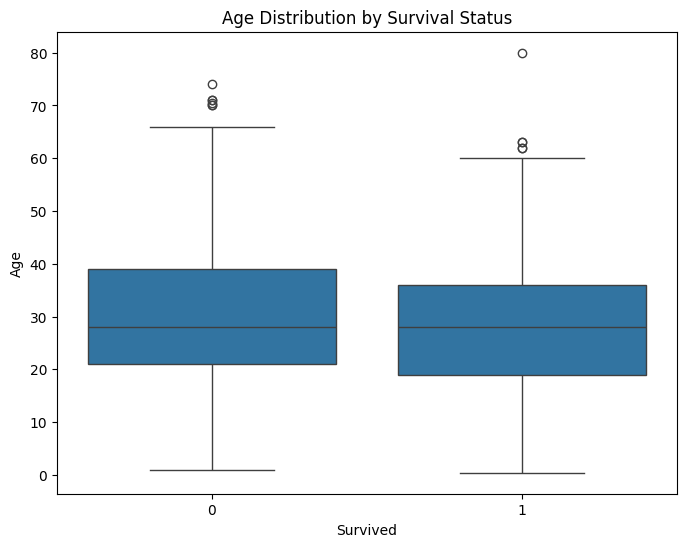

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age Distribution by Survival Status')
plt.show()


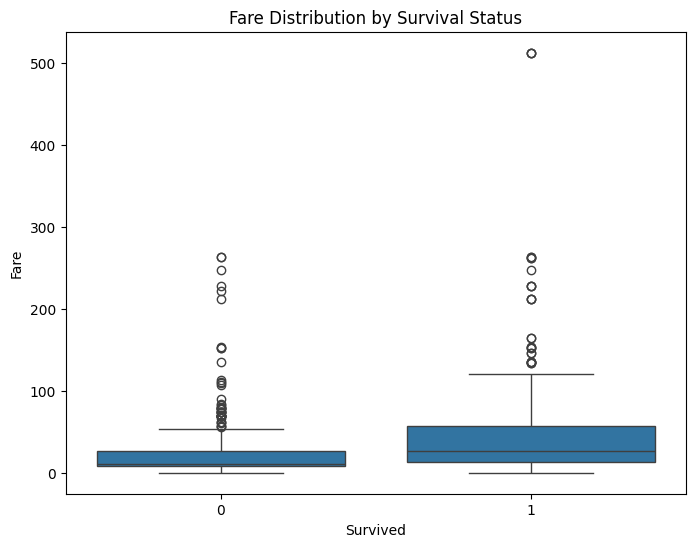

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare Distribution by Survival Status')
plt.show()

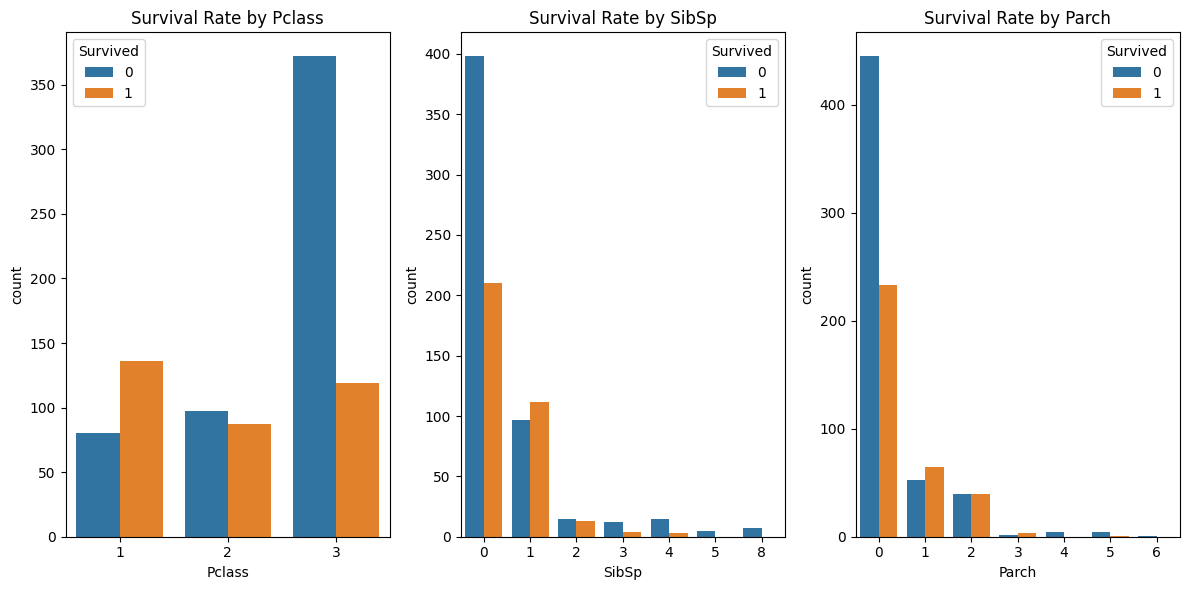

In [14]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, hue='Survived', data=train)
    plt.title(f'Survival Rate by {col}')
plt.tight_layout()
plt.show()

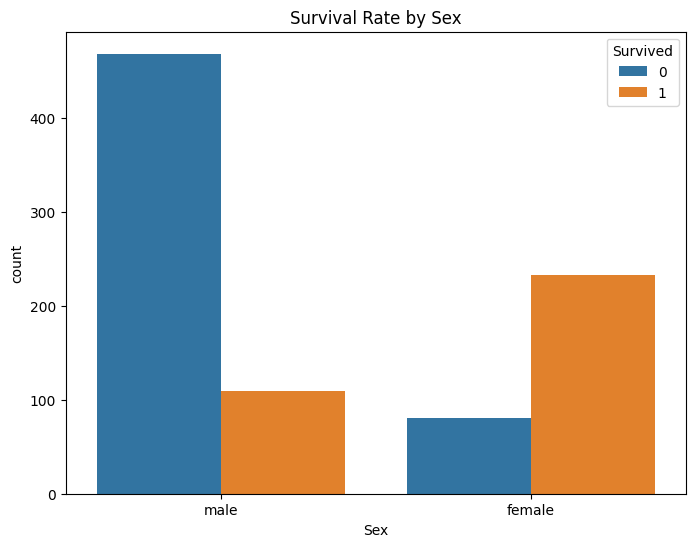

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.show()

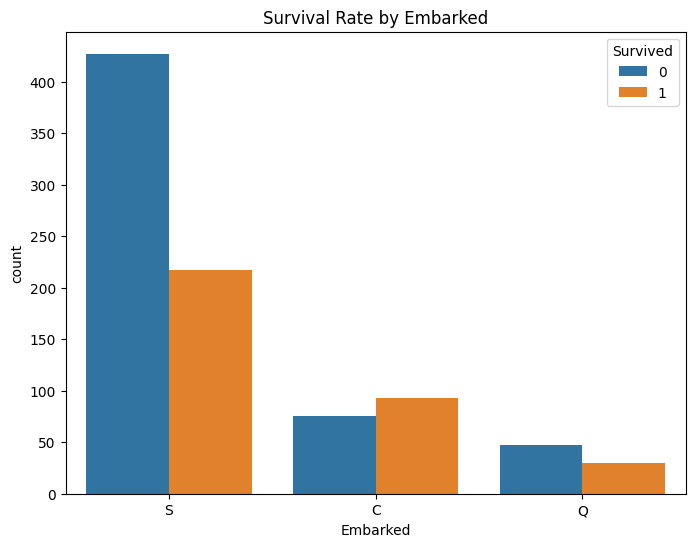

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Survival Rate by Embarked')
plt.show()

# Data Preprocessing

In [17]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

In [98]:
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
print(X_train['Embarked'])
print(test['Embarked'])


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object
0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object


In [96]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Fare']

,Fare
0,7.8292
1,7.0000
2,9.6875
3,8.6625
4,12.2875
...,...
413,8.0500
414,108.9000
415,7.2500
416,8.0500


# Building Predictive Models

In [87]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,roc_curve,auc
combined = pd.concat([X_train, test], axis=0)

In [50]:
categorical_cols = ['Sex', 'Embarked', 'Pclass']


In [23]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(combined[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))


In [24]:
combined = combined.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

In [25]:
combined = combined.drop(categorical_cols, axis=1)
combined = pd.concat([combined, encoded_df], axis=1)


In [27]:
X_train_encoded = combined[:len(X_train)]
X_train_encoded.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [28]:
X_test_encoded = combined[len(X_train):]
X_test_encoded.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
891,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
892,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
893,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
894,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
895,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [34]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
combined[numerical_cols] = scaler.fit_transform(combined[numerical_cols])

X_train_encoded = combined[:len(X_train)]
X_train_encoded.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,-0.576088,0.481288,-0.445,A/5 21171,-0.503291,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663229,0.481288,-0.445,PC 17599,0.734744,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,-0.266258,-0.479087,-0.445,STON/O2. 3101282,-0.490240,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.430857,0.481288,-0.445,113803,0.383183,C123,S
4,5,3,"Allen, Mr. William Henry",male,0.430857,-0.479087,-0.445,373450,-0.487824,NaN,S


In [33]:
X_test_encoded = combined[len(X_train):]
X_test_encoded.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,0.392129,-0.479087,-0.445000,330911,-0.492093,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1.360345,0.481288,-0.445000,363272,-0.508125,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,2.522204,-0.479087,-0.445000,240276,-0.456164,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,-0.188801,-0.479087,-0.445000,315154,-0.475981,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,-0.576088,0.481288,0.710763,3101298,-0.405895,NaN,S


In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']), # Numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Categorical features
    ],
    remainder='drop'
)
preprocessor


ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['PassengerId', 'Pclass', 'Age', 'SibSp',
                                  'Parch', 'Fare']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Embarked', 'Pclass'])])

In [44]:
y_pred = model.predict(X_train_encoded)

In [48]:
accuracy = accuracy_score(Y_train, y_pred)
accuracy

0.8114478114478114

In [45]:
precision = precision_score(Y_train, y_pred)
precision

0.7668711656441718

In [46]:
recall = recall_score(Y_train, y_pred)
recall

0.7309941520467836

In [47]:
f1 = f1_score(Y_train, y_pred)
f1

0.7485029940119761

In [57]:
import lightgbm as lgb
import xgboost as xgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_encoded, Y_train)
lgb_pred = lgb_model.predict(X_train_encoded)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


In [62]:
lgb_accuracy = accuracy_score(Y_train, lgb_pred)
print(f"LightGBM Accuracy: {lgb_accuracy}")
print(classification_report(Y_train, lgb_pred))

LightGBM Accuracy: 0.9988776655443322
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [59]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_encoded, Y_train)
xgb_pred = xgb_model.predict(X_train_encoded)

In [60]:
xgb_accuracy = accuracy_score(Y_train, xgb_pred)
print(f"XGBoost Accuracy: {xgb_accuracy}")
print(classification_report(Y_train, xgb_pred))

XGBoost Accuracy: 0.9988776655443322
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [64]:
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(
    X_train_encoded, Y_train, test_size=0.2, random_state=42
)


In [67]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
lgb_model = lgb.LGBMClassifier(random_state=42)
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_split, Y_train_split)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [68]:
best_lgb_model = grid_search.best_estimator_
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}

In [72]:
lgb_pred_val = best_lgb_model.predict(X_val_split)
lgb_accuracy_val = accuracy_score(Y_val_split, lgb_pred_val)
lgb_accuracy_val

0.8156424581005587

In [69]:
xgb_model = xgb.XGBClassifier(random_state=42)
cv_scores = cross_val_score(xgb_model, X_train_encoded, Y_train, cv=5, scoring='accuracy')

In [71]:
cv_scores

array([0.68156425, 0.80337079, 0.82022472, 0.79775281, 0.83707865])

In [70]:
np.mean(cv_scores)

0.7879982424204381

# Comparative Analysis

In [74]:
lgb_accuracy = accuracy_score(Y_train, lgb_pred)
lgb_precision = precision_score(Y_train, lgb_pred)
lgb_recall = recall_score(Y_train, lgb_pred)
lgb_f1 = f1_score(Y_train, lgb_pred)

In [76]:
xgb_accuracy = accuracy_score(Y_train, xgb_pred)
xgb_precision = precision_score(Y_train, xgb_pred)
xgb_recall = recall_score(Y_train, xgb_pred)
xgb_f1 = f1_score(Y_train, xgb_pred)

In [77]:
print("\nPerformance Comparison:")
print(f"{'Metric':<12} {'LightGBM':<10} {'XGBoost':<10}")
print(f"{'Accuracy':<12} {lgb_accuracy:<10.4f} {xgb_accuracy:<10.4f}")
print(f"{'Precision':<12} {lgb_precision:<10.4f} {xgb_precision:<10.4f}")
print(f"{'Recall':<12} {lgb_recall:<10.4f} {xgb_recall:<10.4f}")
print(f"{'F1-score':<12} {lgb_f1:<10.4f} {xgb_f1:<10.4f}")


Performance Comparison:
Metric       LightGBM   XGBoost   
Accuracy     0.9989     0.9989    
Precision    1.0000     1.0000    
Recall       0.9971     0.9971    
F1-score     0.9985     0.9985    


In [78]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Survived', 'Survived'],
                yticklabels=['Not Survived', 'Survived'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

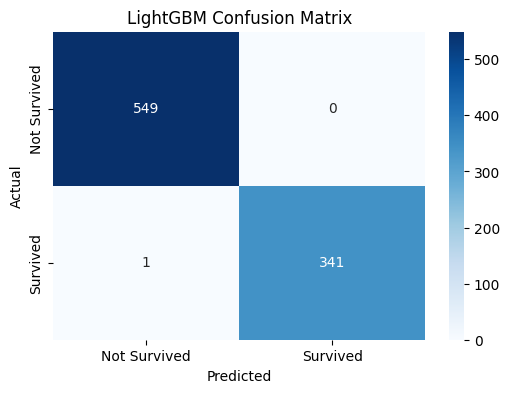

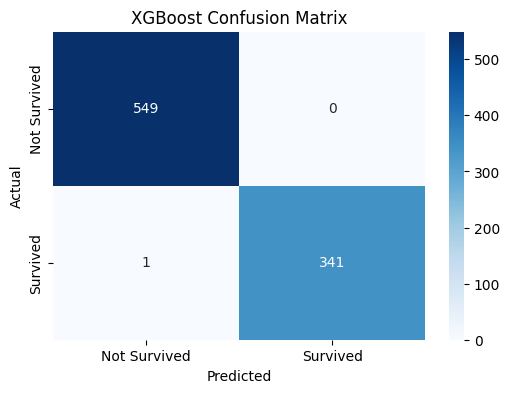

In [79]:
plot_confusion_matrix(Y_train, lgb_pred, 'LightGBM Confusion Matrix')
plot_confusion_matrix(Y_train, xgb_pred, 'XGBoost Confusion Matrix')

In [92]:

xgb_model.fit(X_train_encoded, Y_train)

lgb_probs = best_lgb_model.predict_proba(X_val_split)[:, 1]
xgb_probs = xgb_model.predict_proba(X_val_split)[:, 1]



In [89]:
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(Y_val_split, lgb_probs)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)


In [93]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_val_split, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)


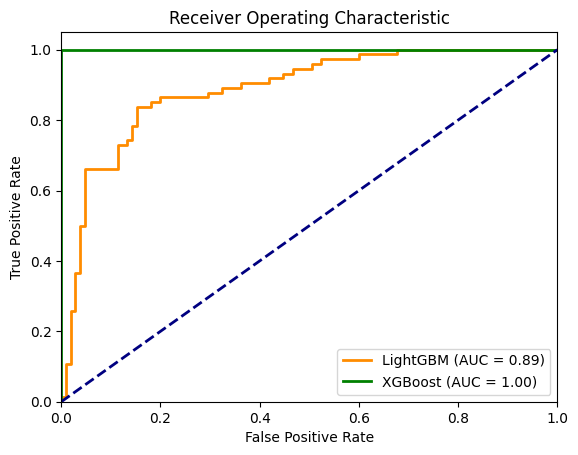

In [91]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_val_split, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure()
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_lgb)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
